<h1 style="background-color: #4CAF50; color: #ffffff; padding: 15px; border-radius: 10px; text-align: center;">
  Import Libraries and Load Data
</h1>


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")

df=pd.read_csv("/kaggle/input/crop-yield-prediction-dataset/yield_df.csv")
print(df.info())
print(df.isnull().sum())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB
None
Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonn

<h1 style="background-color: #4CAF50; color: #ffffff; padding: 15px; border-radius: 10px; text-align: center;">
  Exploratory Data Analysis (EDA)
</h1>


In [2]:
df.drop(columns=['Unnamed: 0'], inplace=True)
summary_stats = df.describe()
print(summary_stats)

               Year    hg/ha_yield  average_rain_fall_mm_per_year  \
count  28242.000000   28242.000000                    28242.00000   
mean    2001.544296   77053.332094                     1149.05598   
std        7.051905   84956.612897                      709.81215   
min     1990.000000      50.000000                       51.00000   
25%     1995.000000   19919.250000                      593.00000   
50%     2001.000000   38295.000000                     1083.00000   
75%     2008.000000  104676.750000                     1668.00000   
max     2013.000000  501412.000000                     3240.00000   

       pesticides_tonnes      avg_temp  
count       28242.000000  28242.000000  
mean        37076.909344     20.542627  
std         59958.784665      6.312051  
min             0.040000      1.300000  
25%          1702.000000     16.702500  
50%         17529.440000     21.510000  
75%         48687.880000     26.000000  
max        367778.000000     30.650000  


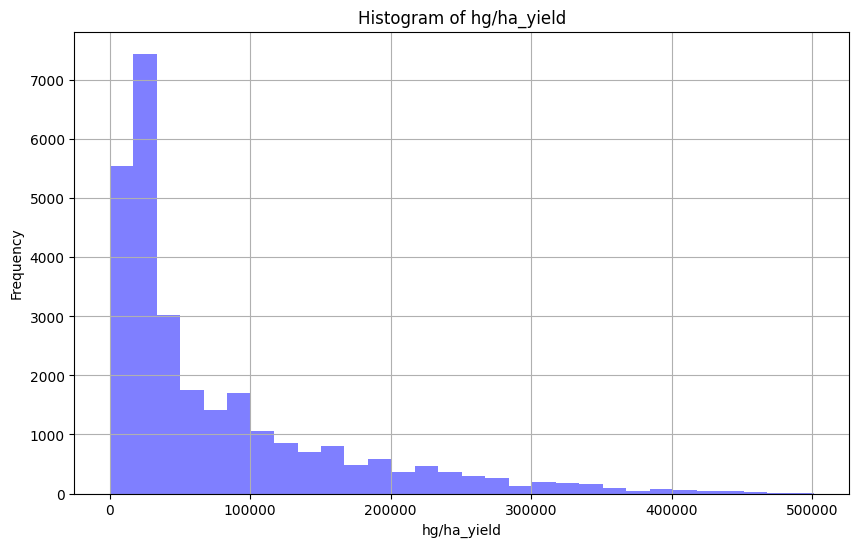

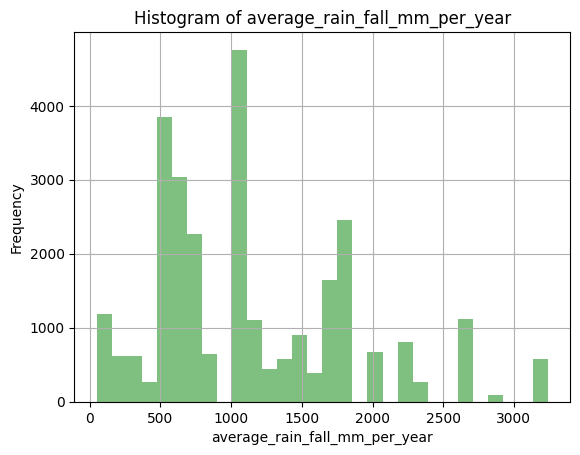

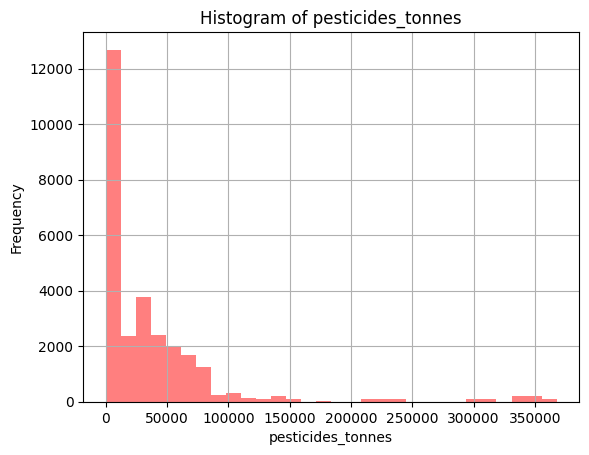

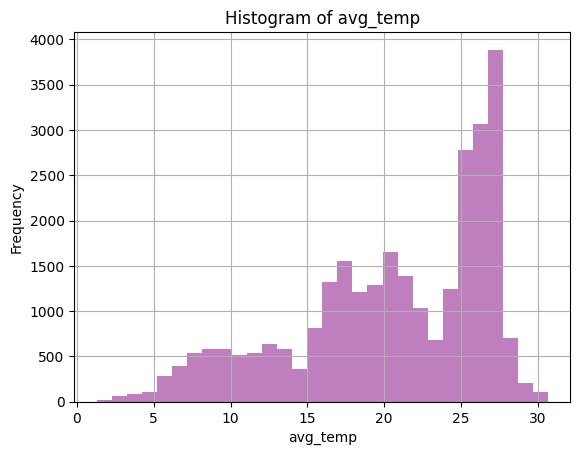

In [3]:
plt.figure(figsize=(10, 6))

# Histograms
df['hg/ha_yield'].hist(bins=30, alpha=0.5, color='blue')
plt.title('Histogram of hg/ha_yield')
plt.xlabel('hg/ha_yield')
plt.ylabel('Frequency')
plt.show()




df['average_rain_fall_mm_per_year'].hist(bins=30, alpha=0.5, color='green')
plt.title('Histogram of average_rain_fall_mm_per_year')
plt.xlabel('average_rain_fall_mm_per_year')
plt.ylabel('Frequency')
plt.show()




df['pesticides_tonnes'].hist(bins=30, alpha=0.5, color='red')
plt.title('Histogram of pesticides_tonnes')
plt.xlabel('pesticides_tonnes')
plt.ylabel('Frequency')
plt.show()


df['avg_temp'].hist(bins=30, alpha=0.5, color='purple')
plt.title('Histogram of avg_temp')
plt.xlabel('avg_temp')
plt.ylabel('Frequency')
plt.show()


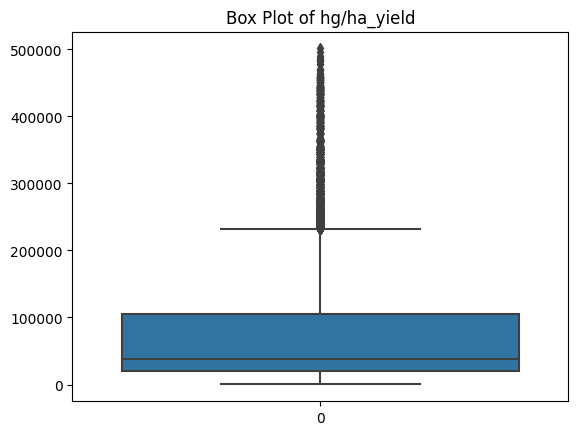

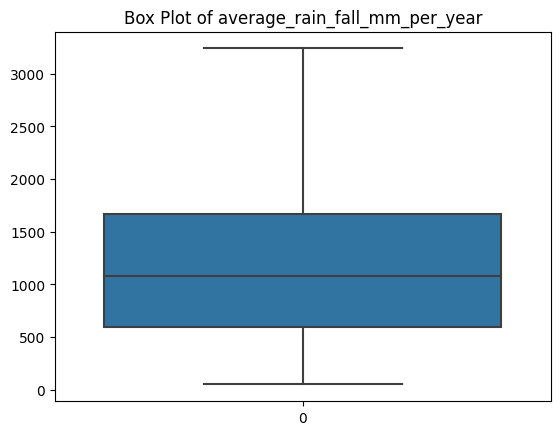

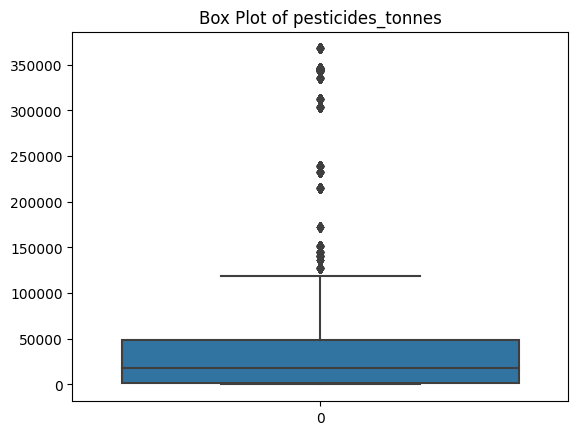

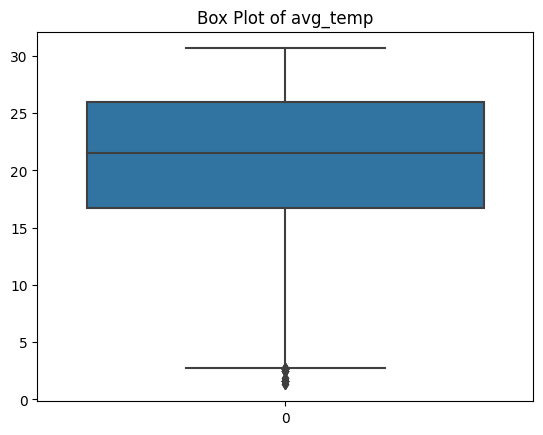

In [4]:
# Box Plots
sns.boxplot(data=df['hg/ha_yield'])
plt.title('Box Plot of hg/ha_yield')
plt.show()

sns.boxplot(data=df['average_rain_fall_mm_per_year'])
plt.title('Box Plot of average_rain_fall_mm_per_year')
plt.show()

sns.boxplot(data=df['pesticides_tonnes'])
plt.title('Box Plot of pesticides_tonnes')
plt.show()

sns.boxplot(data=df['avg_temp'])
plt.title('Box Plot of avg_temp')
plt.show()

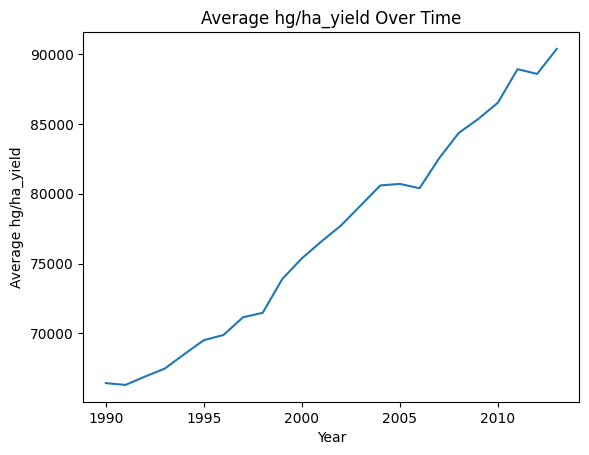

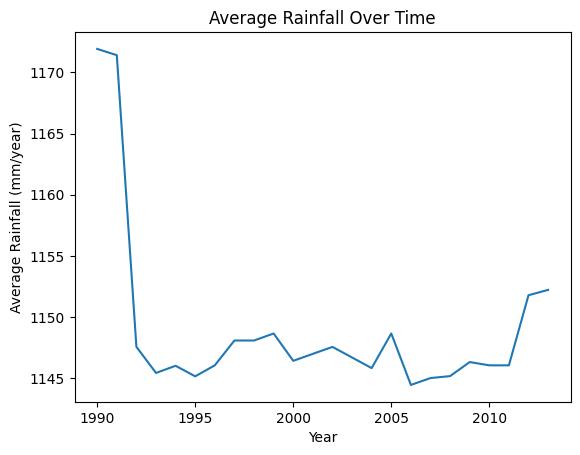

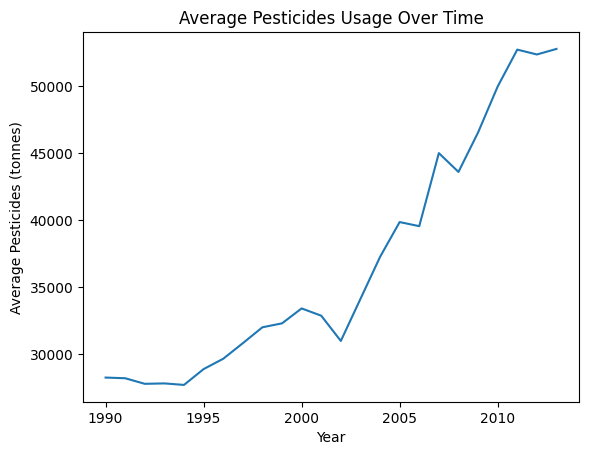

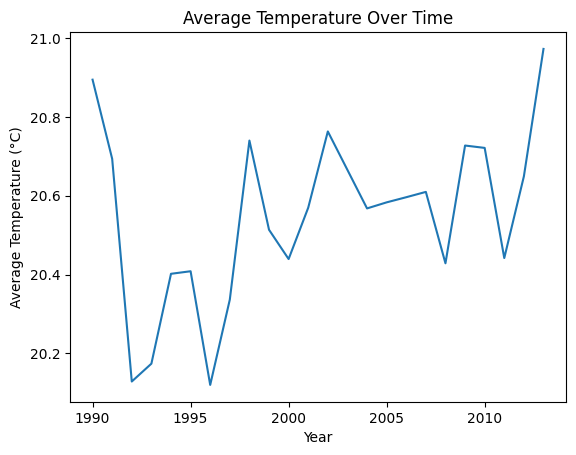

In [5]:
# Time Series Analysis
df.groupby('Year')['hg/ha_yield'].mean().plot()
plt.title('Average hg/ha_yield Over Time')
plt.xlabel('Year')
plt.ylabel('Average hg/ha_yield')
plt.show()

df.groupby('Year')['average_rain_fall_mm_per_year'].mean().plot()
plt.title('Average Rainfall Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm/year)')
plt.show()

df.groupby('Year')['pesticides_tonnes'].mean().plot()
plt.title('Average Pesticides Usage Over Time')
plt.xlabel('Year')
plt.ylabel('Average Pesticides (tonnes)')
plt.show()

df.groupby('Year')['avg_temp'].mean().plot()
plt.title('Average Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.show()


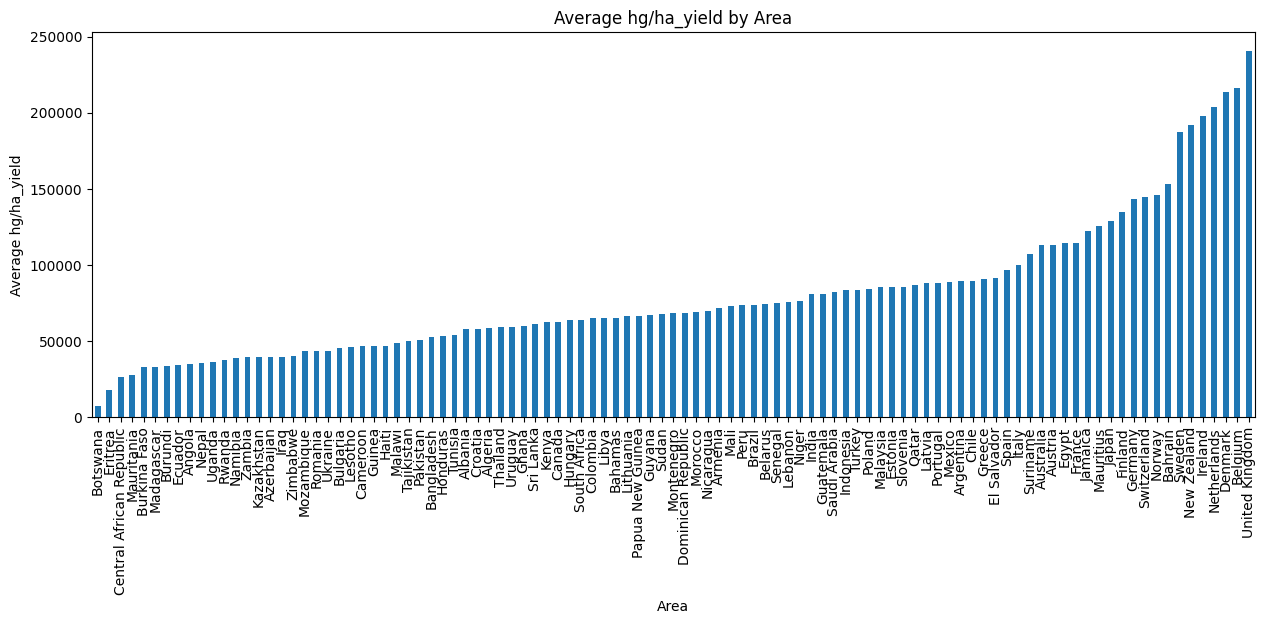

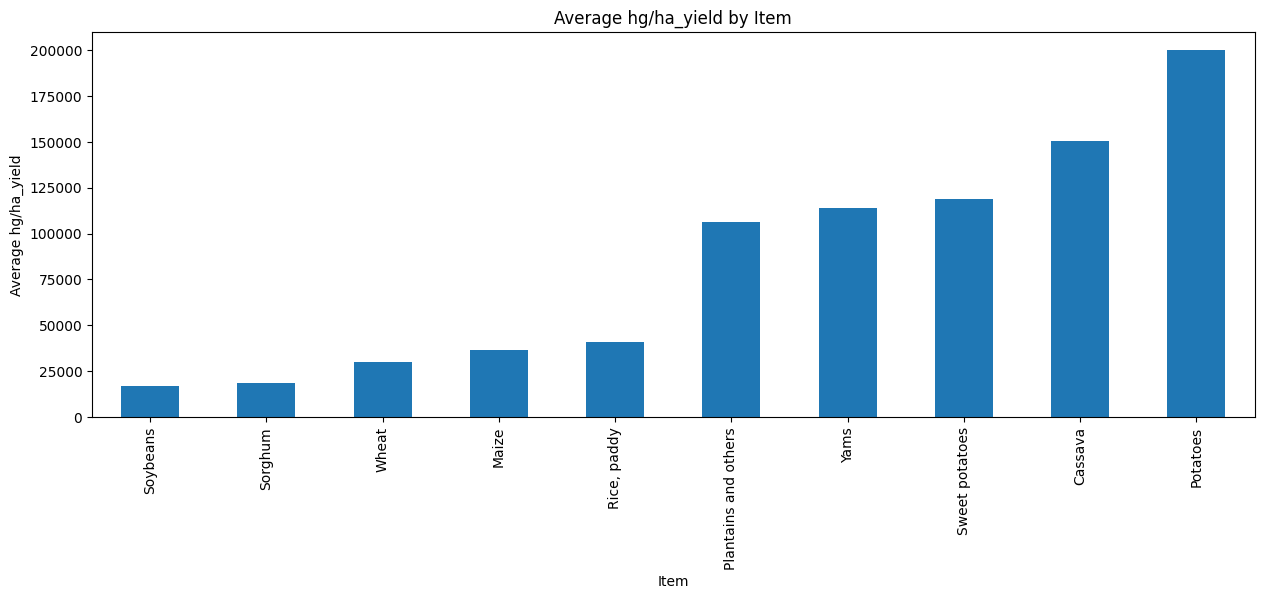

In [6]:
# Comparisons
df.groupby('Area')['hg/ha_yield'].mean().sort_values().plot(kind='bar', figsize=(15, 5))
plt.title('Average hg/ha_yield by Area')
plt.xlabel('Area')
plt.ylabel('Average hg/ha_yield')
plt.show()

df.groupby('Item')['hg/ha_yield'].mean().sort_values().plot(kind='bar', figsize=(15, 5))
plt.title('Average hg/ha_yield by Item')
plt.xlabel('Item')
plt.ylabel('Average hg/ha_yield')
plt.show()



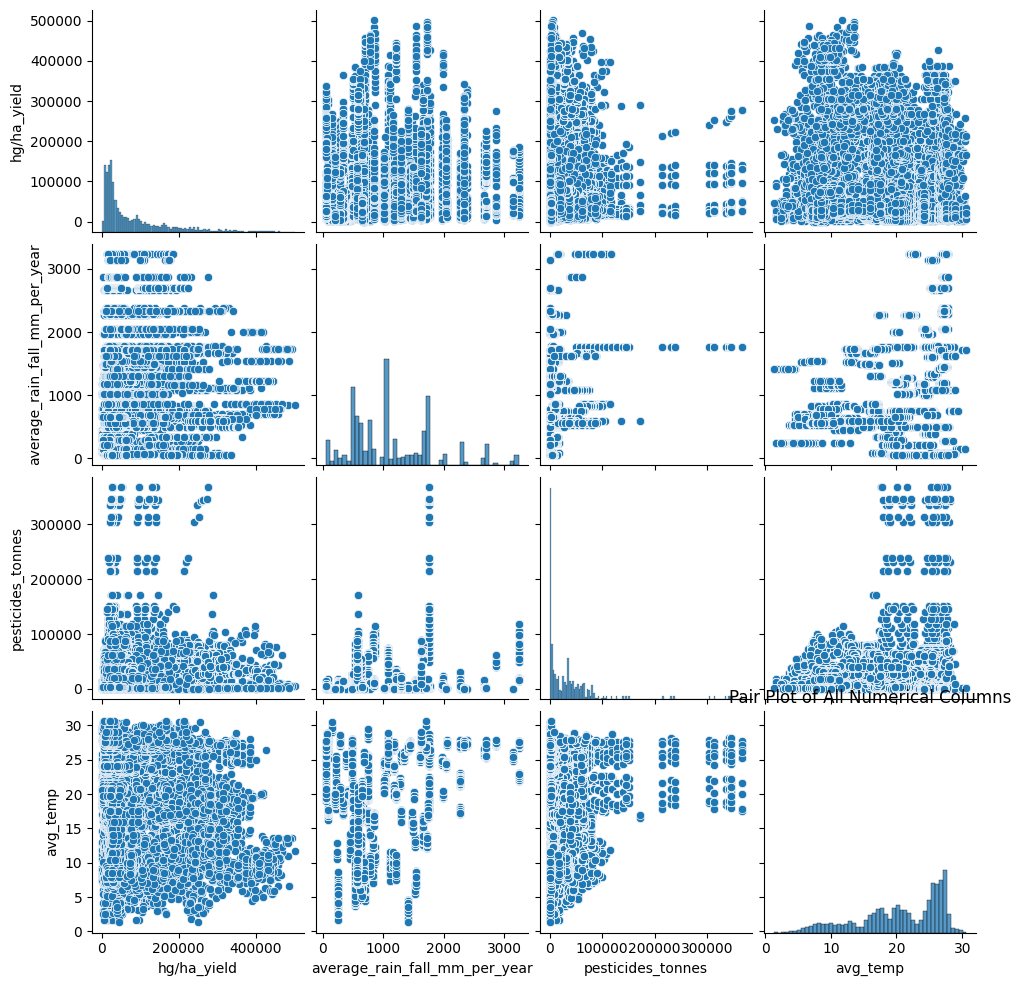

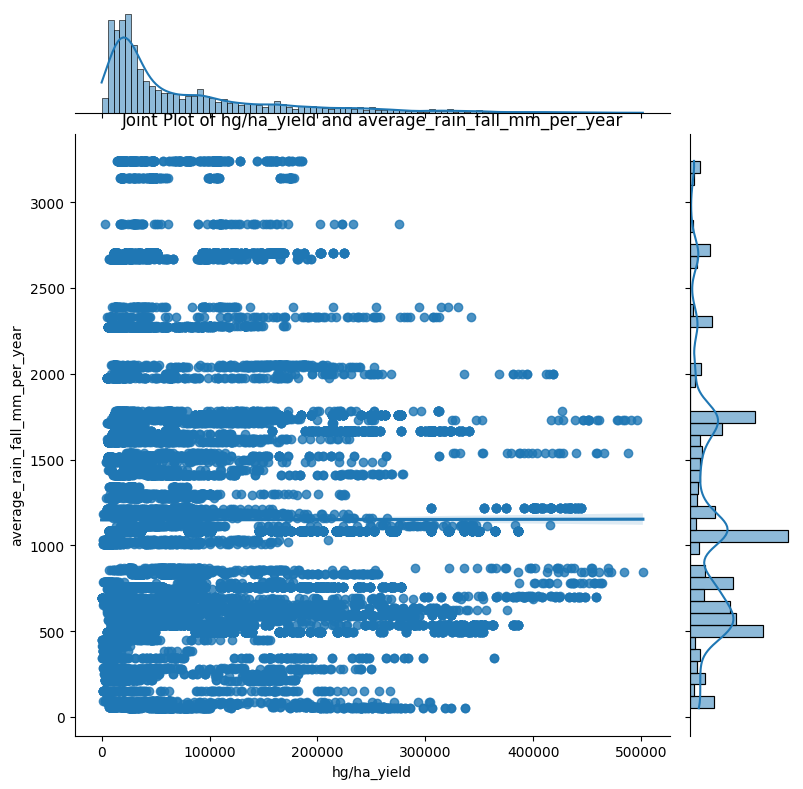

In [7]:
# Pair Plots and Joint Plots
sns.pairplot(df[['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']])
plt.title('Pair Plot of All Numerical Columns')
plt.show()

sns.jointplot(x='hg/ha_yield', y='average_rain_fall_mm_per_year', data=df, kind='reg', height=8)
plt.title('Joint Plot of hg/ha_yield and average_rain_fall_mm_per_year')
plt.show()



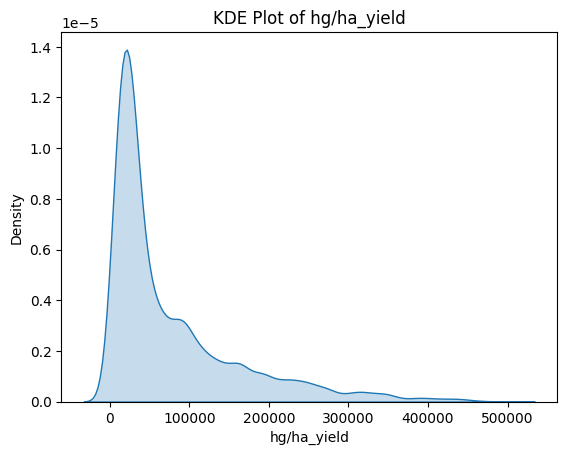

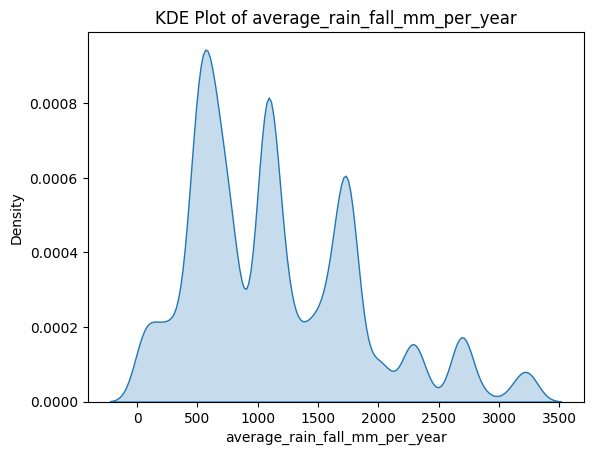

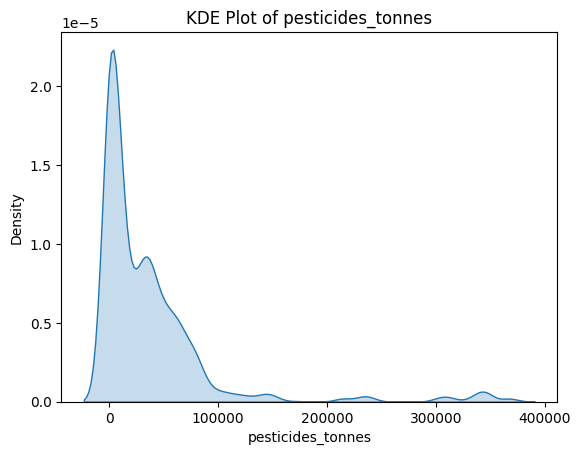

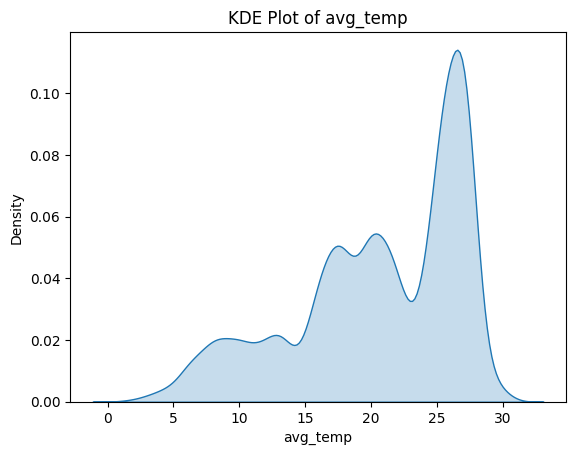

In [8]:
# Distribution Plots
sns.kdeplot(df['hg/ha_yield'], shade=True)
plt.title('KDE Plot of hg/ha_yield')
plt.show()

sns.kdeplot(df['average_rain_fall_mm_per_year'], shade=True)
plt.title('KDE Plot of average_rain_fall_mm_per_year')
plt.show()

sns.kdeplot(df['pesticides_tonnes'], shade=True)
plt.title('KDE Plot of pesticides_tonnes')
plt.show()

sns.kdeplot(df['avg_temp'], shade=True)
plt.title('KDE Plot of avg_temp')
plt.show()

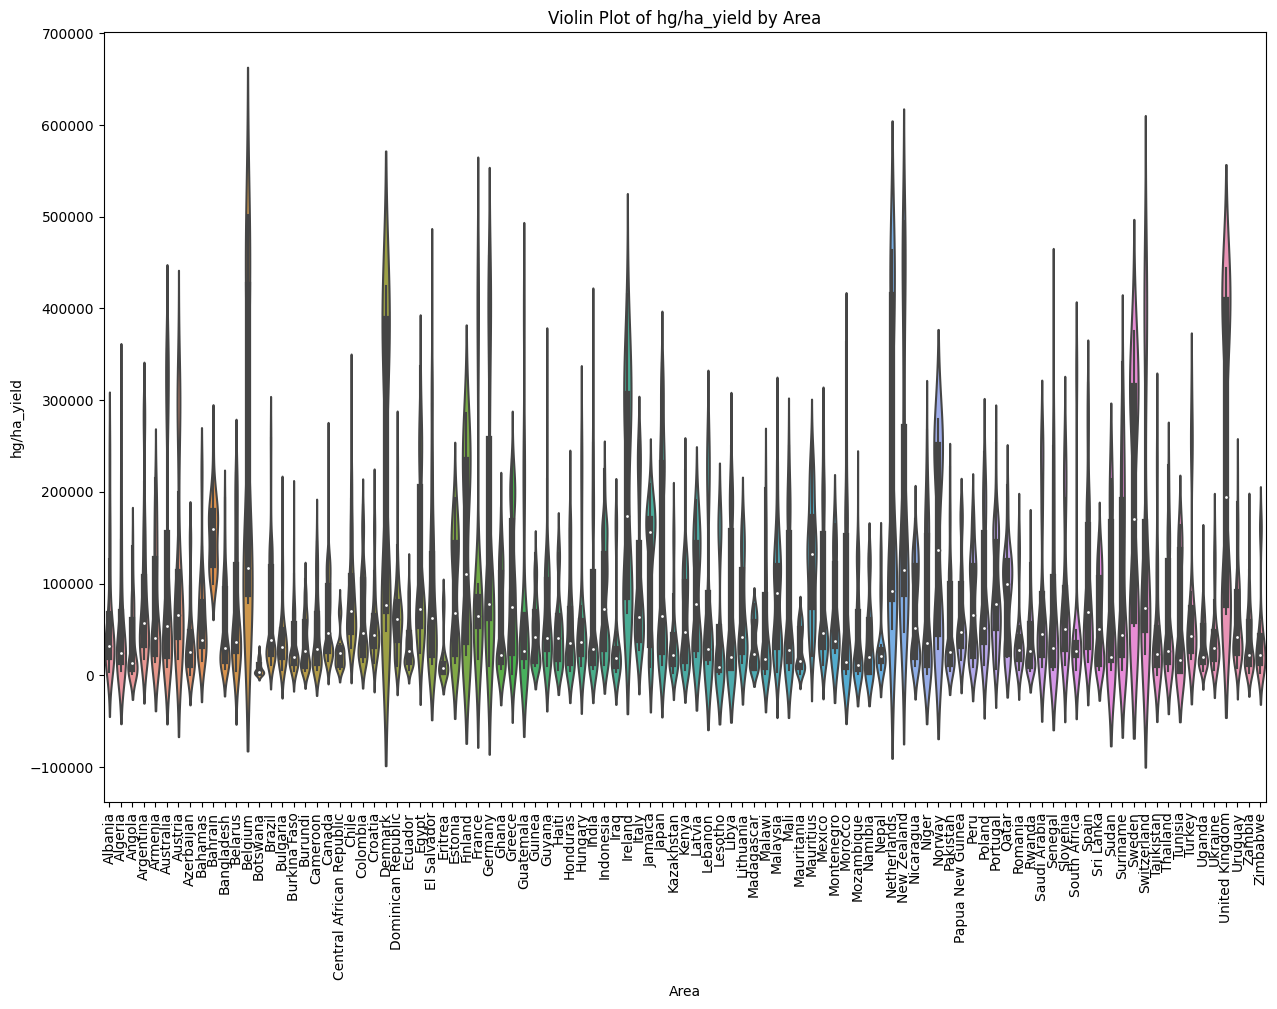

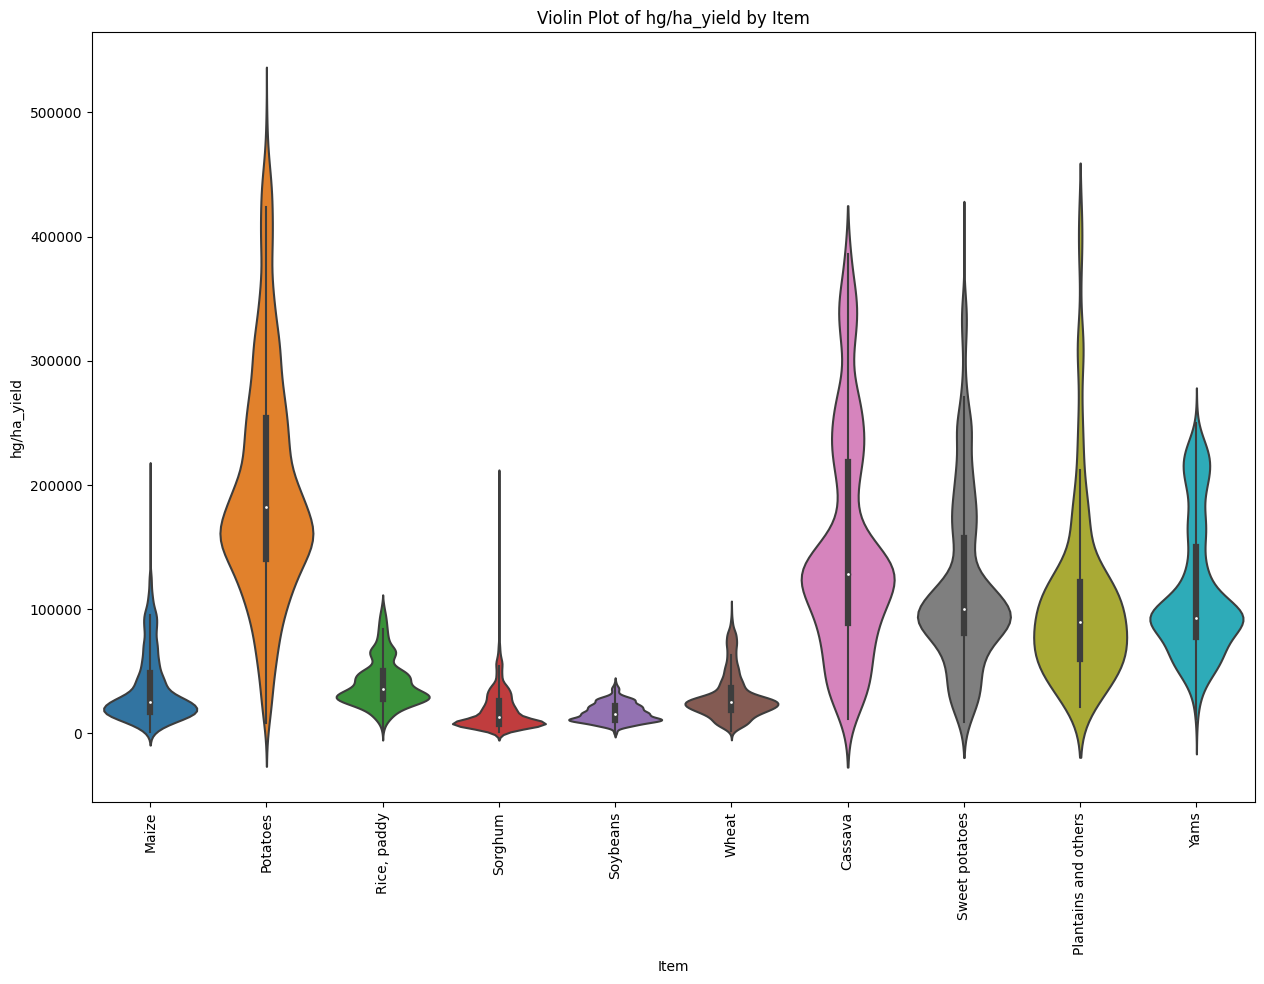

In [9]:
#Violin Plots
plt.figure(figsize=(15, 10))
sns.violinplot(x='Area', y='hg/ha_yield', data=df, scale='width')
plt.title('Violin Plot of hg/ha_yield by Area')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15, 10))
sns.violinplot(x='Item', y='hg/ha_yield', data=df, scale='width')
plt.title('Violin Plot of hg/ha_yield by Item')
plt.xticks(rotation=90)
plt.show()


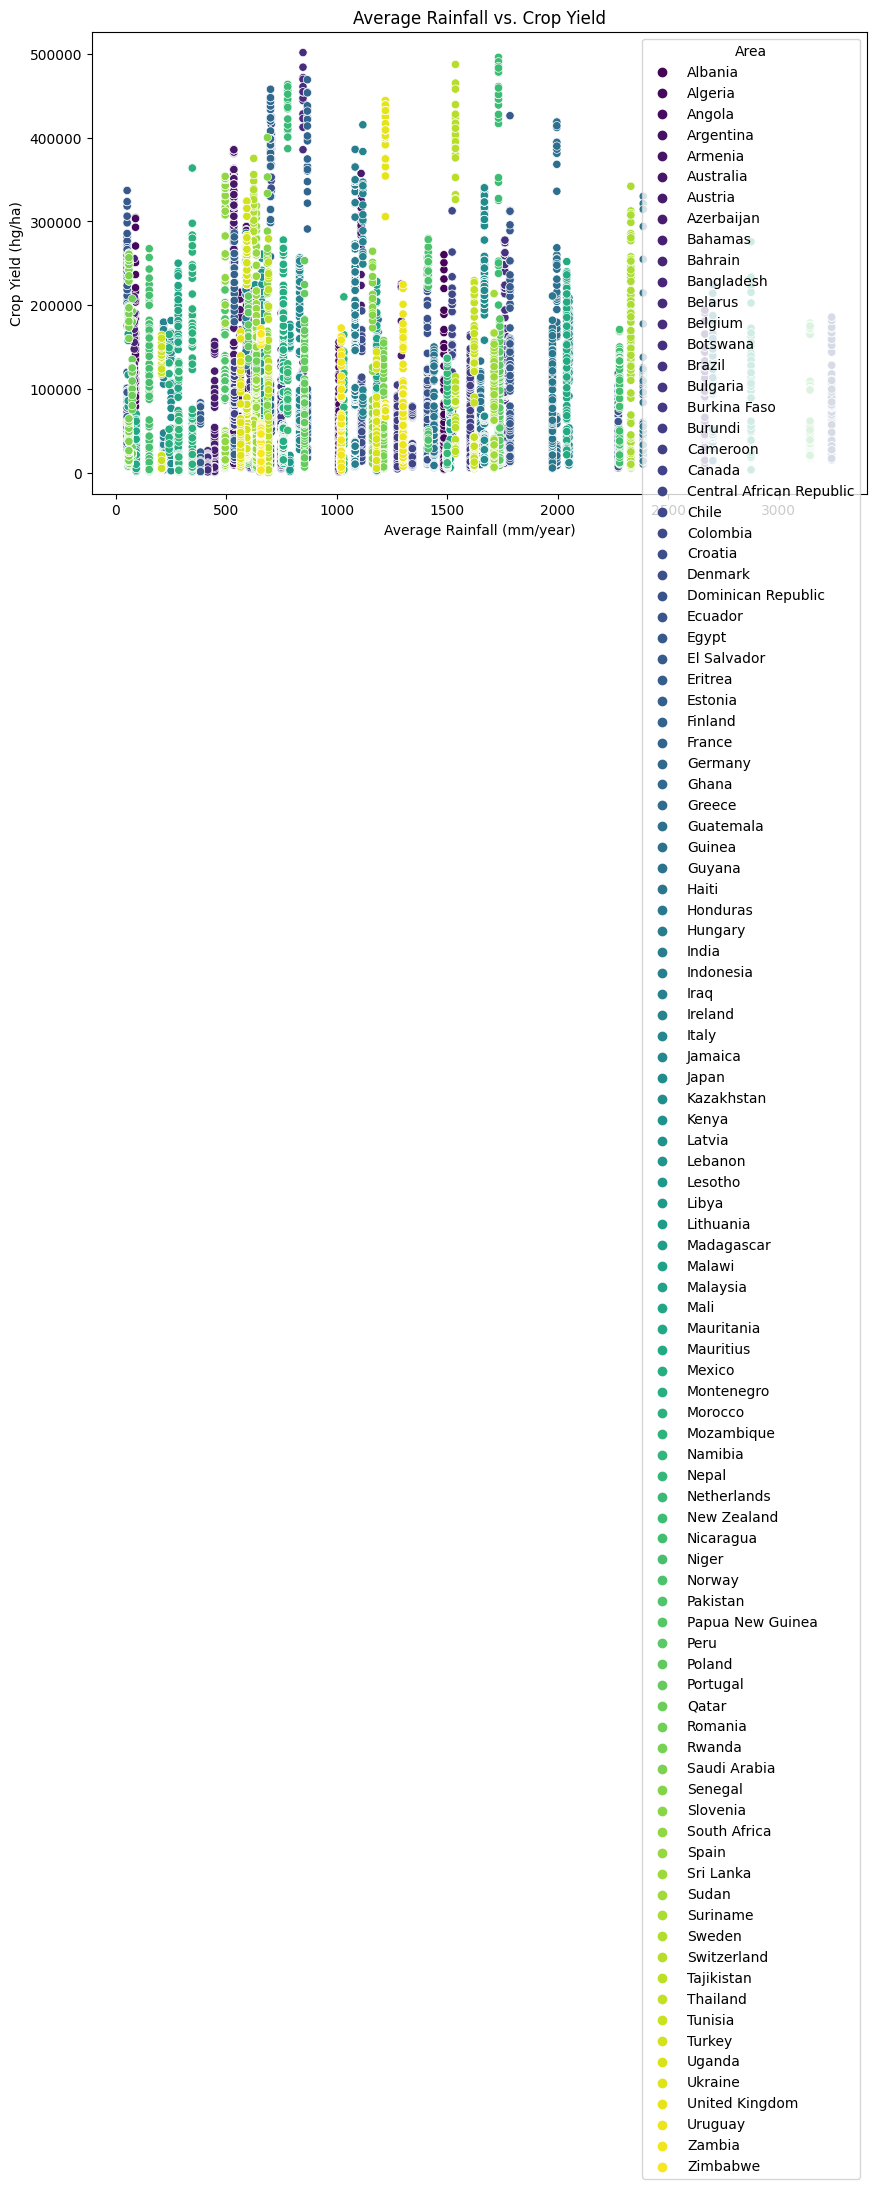

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_rain_fall_mm_per_year', y='hg/ha_yield', data=df, hue='Area', palette='viridis')
plt.title('Average Rainfall vs. Crop Yield')
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('Crop Yield (hg/ha)')
plt.show()


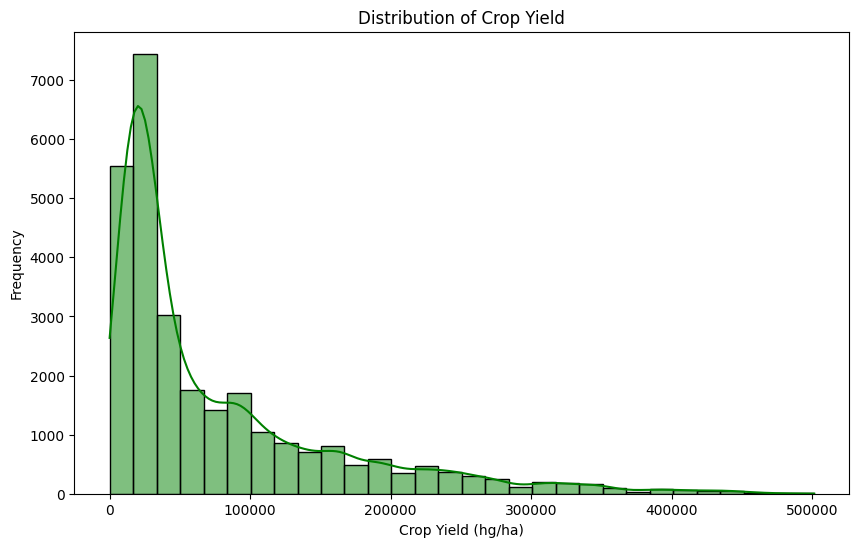

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['hg/ha_yield'], bins=30, kde=True, color='green')
plt.title('Distribution of Crop Yield')
plt.xlabel('Crop Yield (hg/ha)')
plt.ylabel('Frequency')
plt.show()


<h1 style="background-color: #4CAF50; color: #ffffff; padding: 15px; border-radius: 10px; text-align: center;">
  Decision Tree, Random Forest, and Gradient Boosting Models
</h1>


In [12]:
# Encode categorical variables
label_encoder_area = LabelEncoder()
df['Area'] = label_encoder_area.fit_transform(df['Area'])

label_encoder_item = LabelEncoder()
df['Item'] = label_encoder_item.fit_transform(df['Item'])

# Define features and target variable
X = df.drop(columns=['hg/ha_yield'])
y = df['hg/ha_yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

# Initialize models
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
random_forest_regressor = RandomForestRegressor(random_state=42)
gradient_boosting_regressor = GradientBoostingRegressor(random_state=42)

# Fit the models
decision_tree_regressor.fit(X_train, y_train)
random_forest_regressor.fit(X_train, y_train)
gradient_boosting_regressor.fit(X_train, y_train)

# Evaluate the models
models = [decision_tree_regressor, random_forest_regressor, gradient_boosting_regressor]
model_names = ['Decision Tree', 'Random Forest', 'Gradient Boosting']

for model, name in zip(models, model_names):
    mse, r2 = evaluate_model(model, X_test, y_test)
    print(f'{name} - MSE: {mse:.4f}, R^2: {r2:.4f}')


Decision Tree - MSE: 178560444.6638, R^2: 0.9754
Random Forest - MSE: 103594760.6749, R^2: 0.9857
Gradient Boosting - MSE: 1209218737.2061, R^2: 0.8333


<h1 style="background-color: #4CAF50; color: #ffffff; padding: 15px; border-radius: 10px; text-align: center;">
  Model Evaluation: Random Forest, Decision Tree, and Gradient Boosting
</h1>


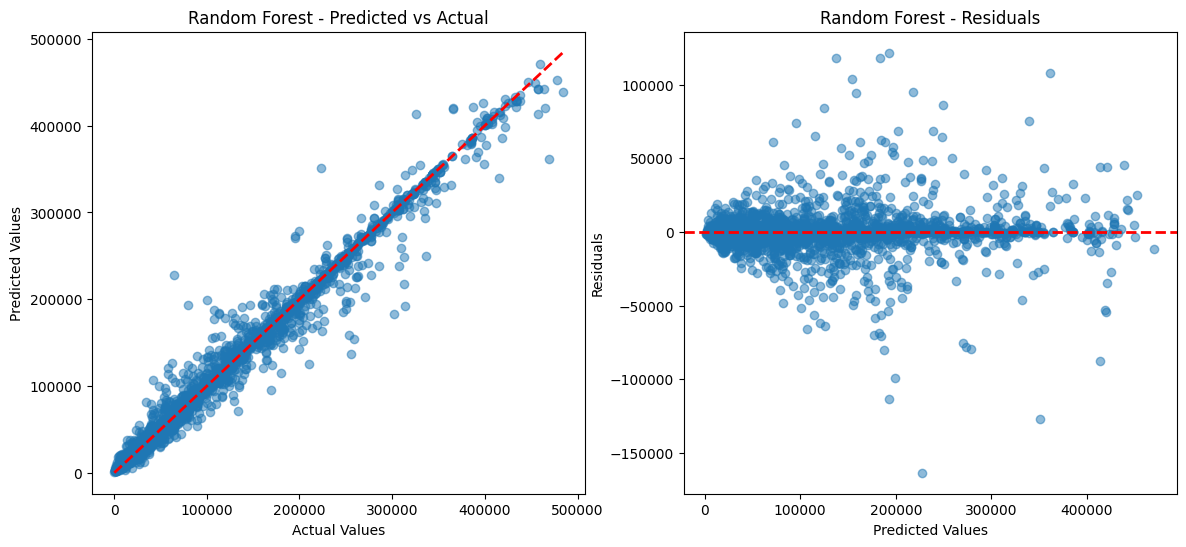

Random Forest - MSE: 104191262.3640, R²: 0.9856


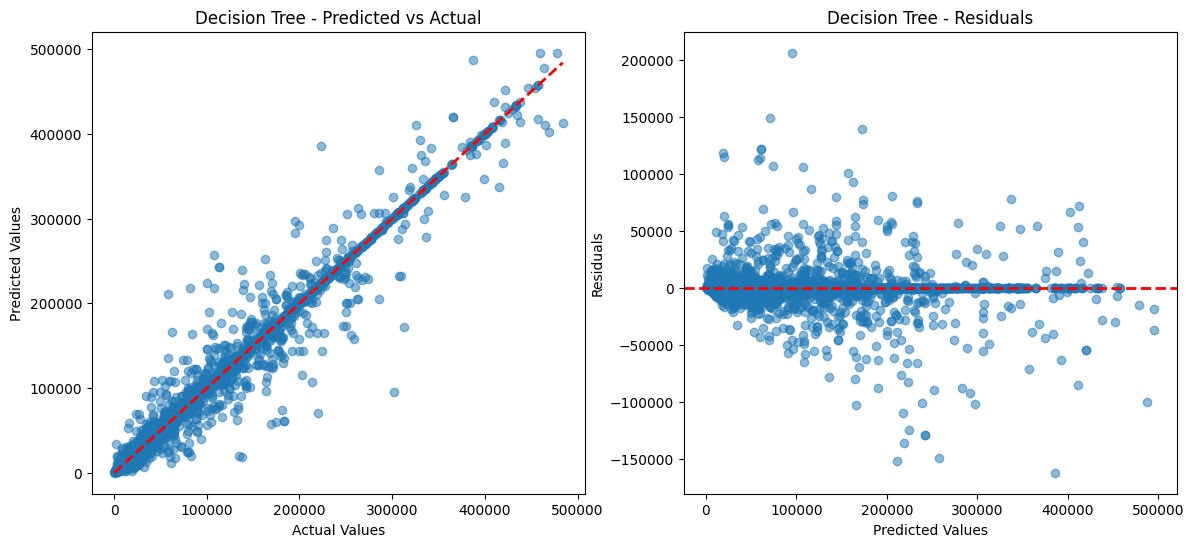

Decision Tree - MSE: 178560444.6638, R²: 0.9754


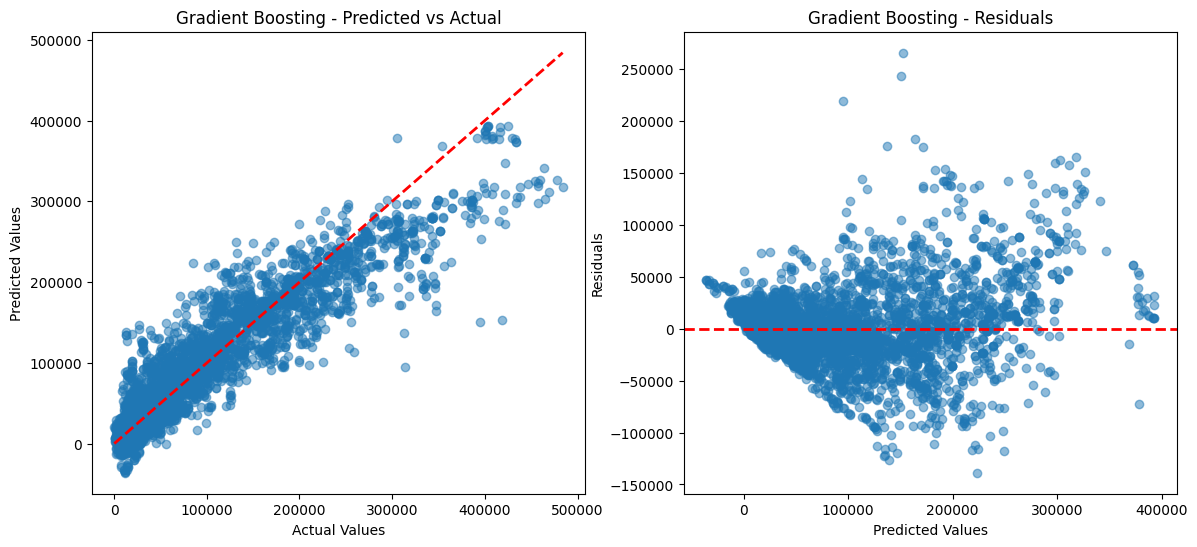

Gradient Boosting - MSE: 930921554.5516, R²: 0.8717


In [14]:
# Function to plot evaluation metrics
def plot_evaluation_metrics(model_name, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    #  Predicted vs Actual values plot 
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} - Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

    #  Residuals plot 
    residuals = y_test - y_pred
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{model_name} - Residuals')
    plt.axhline(y=0, color='r', linestyle='--', lw=2)

    plt.show()

    # Print MSE and R² Score
    print(f'{model_name} - MSE: {mse:.4f}, R²: {r2:.4f}')

# Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=200)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
plot_evaluation_metrics('Random Forest', y_test, y_pred_rf)

# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
plot_evaluation_metrics('Decision Tree', y_test, y_pred_dt)

# Gradient Boosting
gb = GradientBoostingRegressor(random_state=42, n_estimators=200)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
plot_evaluation_metrics('Gradient Boosting', y_test, y_pred_gb)


<h2 style="background-color: #f2f2f2; color: #333333; padding: 10px; border-radius: 8px; text-align: center;">
  Thank You for Viewing! Please Upvote if You Found This Helpful!
</h2>
